In [11]:
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torchvision.models._api import WeightsEnum
from torch.hub import load_state_dict_from_url


def get_state_dict(self, *args, **kwargs):
    kwargs.pop("check_hash")
    return load_state_dict_from_url(self.url, *args, **kwargs)


WeightsEnum.get_state_dict = get_state_dict

efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
efficientnet_b0(weights="DEFAULT")

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-3dd342df.pth
100.0%


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Model will be trained on cuda


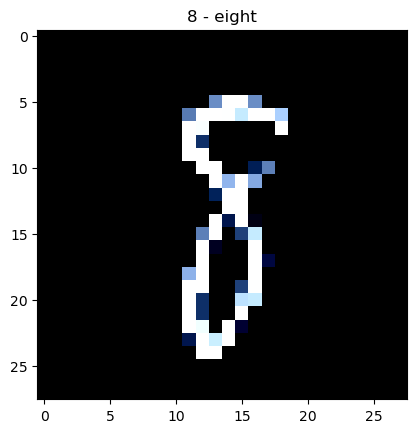

In [1]:
import torch
import os
import matplotlib.pyplot as plt
from scripts import setup_data, model_spawner, engine, utils, pretrained_spawner
from torchvision import transforms

# Setup Hyperparameters
BATCH_SIZE = 32
EPOCHOS = 10
HIDDEN_UNITS = 10

# Setup device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Model will be trained on {device}")

# Setup transforms
transforms = transforms.Compose(
    [
        transforms.Resize((28, 28)),
        transforms.Grayscale(3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

# Create dataloaders using `setup_data.py` script
train_dataloader, test_dataloader, class_names = setup_data.create_dataloaders(
    batch_size=BATCH_SIZE, transform=transforms
)


# Plot a random sample from the dataset
utils.visualize_sample_image(class_names=class_names, dataloader=train_dataloader)

assert len(class_names) == 10  # MNIST has 10 classes (Digits 0 - 9)

In [3]:
# import torchvision

# weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
# efficientnet = torchvision.models.efficientnet_b0(weights="DEFAULT")
# efficientnet

In [4]:
### Setup a Model
# model = model_spawner.VGG(
#     input=1, output=len(class_names), hidden_units=HIDDEN_UNITS
# ).to(device)
# model = model_spawner.BaseLine(
#     input=28 * 28, output=len(class_names), hidden_units=HIDDEN_UNITS
# ).to(device)

# 1280
model = pretrained_spawner.EfficientNetMNIST().to(device)

In [5]:
optimizer = torch.optim.Adam(lr=0.001, params=model.parameters())
loss_fn = torch.nn.CrossEntropyLoss()  # Because wue have multiple classes

### Training & Testing Loop
results = engine.train(
    model=model,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=EPOCHOS,
    device=device,
)

Epoch 1|Test Acc: 0.64|Train Acc: 0.57|Train Loss: 1.300|Test Loss: 1.118|
Epoch 2|Test Acc: 0.65|Train Acc: 0.59|Train Loss: 1.246|Test Loss: 1.076|
